In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier # use this in future, contains other two
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [491]:
resf=['no_pert.csv','lo_pert.csv','hi_pert.csv']
for resfile in resf:
    dff=pd.read_csv(resfile)
    dff['mass']=dff['emepla(i)/emet']+dff['emegas(i)']
    nlist=['ident', 'com', 'nplanets', 'massbudget', 'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',  'qest','scfac','ngi','mtr','apert']
    
    rdata=np.zeros((len(np.unique(dff.ident)),len(nlist)))
    kk=0
    fpert=dff.fpert.iloc[0]
    for i in np.unique(dff.ident):    
        filter=dff.ident==i
        dummy=dff[filter]
        pmass=dummy.mass
        com=((pmass*dummy['a(i)']).sum())/pmass.sum()
        npl=len(dummy)
        mtot=pmass.sum()
        sigmag0=dummy.sigmag_0.iloc[0]
        effm=mtot*3e-6/(dummy.emed.iloc[0])
        rc=dummy.rc.iloc[0]
        ms=dummy.emestar.iloc[0]/2e33
        md=dummy.emed.iloc[0]*ms
        metal=dummy.emetal.iloc[0]
        taugas=dummy.taugas.iloc[0]   
        qest=dummy.qest.iloc[0]
        scfac=fpert/np.sqrt(ms)
        boogi=dummy.mass>10 # 10 earth masses as giant mass limit
        ngi=(boogi).sum()
        apert=dummy.apert.iloc[0]
        mtr=(dummy.mass[np.logical_not(boogi)]).sum()
        rdata[kk,:]=i,com,npl,mtot,effm,sigmag0,md,rc,ms,metal,taugas,qest,scfac,ngi,mtr,apert
        kk=kk+1
    pd.DataFrame(rdata,columns=nlist).to_csv('proc_%s.csv'%resfile[:-4])

In [66]:
dfpno=pd.read_csv('proc_no_pert.csv',index_col=None)
dfpno["gia"]=dfpno.ngi>0
dfpno["scfac"]=0.
dfplo=pd.read_csv('proc_lo_pert.csv',index_col=None)
dfplo["gia"]=dfplo.ngi>0
dfphi=pd.read_csv('proc_hi_pert.csv',index_col=None)
dfphi["gia"]=dfphi.ngi>0

In [67]:
dfpno.head()

,Unnamed: 0,ident,com,nplanets,massbudget,massefficiency,sigmag0,md,rc,ms,metal,taugas,qest,scfac,ngi,mtr,apert,gia
0,0,1.0,0.748535,9.0,91.042077,0.001517,158.835559,0.128285,40.040195,0.712693,-0.092791,3.525594e+06,2.281872,0.0,1.0,11.814637,0.0,True
1,1,3.0,1.081461,10.0,10770.309627,0.576981,90.793337,0.049286,29.539343,0.880114,0.328146,1.644711e+06,8.421395,0.0,4.0,12.004623,0.0,True
2,2,5.0,2.932894,12.0,17.882769,0.000488,102.431593,0.118280,38.977428,1.075269,-0.150160,1.014449e+06,5.464831,0.0,0.0,17.882769,0.0,False
3,3,6.0,0.110789,12.0,2422.342359,0.060559,75.740878,0.103391,47.343380,0.861595,0.021273,1.790533e+06,4.412694,0.0,1.0,29.771089,0.0,True
4,4,7.0,1.341312,10.0,4001.372990,0.066690,139.408777,0.151598,42.739063,0.842211,-0.092571,2.721395e+06,2.716673,0.0,1.0,12.925807,0.0,True


In [414]:
nlist

['ident',
 'com',
 'nplanets',
 'massbudget',
 'massefficiency',
 'sigmag0',
 'md',
 'rc',
 'ms',
 'metal',
 'taugas',
 'qest',
 'scfac',
 'ngi',
 'mtr']

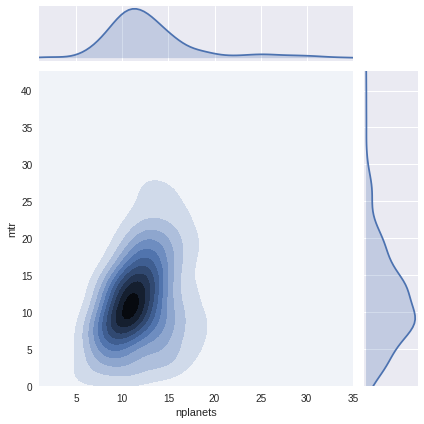

In [495]:
df=dfpno
v=[nlist[2],nlist[-2]]
xmin=df[v[0]].min()
xmax=df[v[0]].max()
ymin=df[v[1]].min()
ymax=df[v[1]].max()
ax=sns.jointplot(x=v[0], y=v[1], data=df,kind="kde",stat_func=None,xlim=(xmin,xmax),ylim=(ymin,ymax))


In [ ]:
 nlist=['ident', 'com', 'nplanets', 'massbudget', 'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',  'qest','scfac','ngi','mtr']


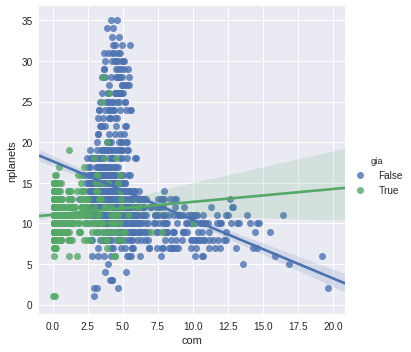

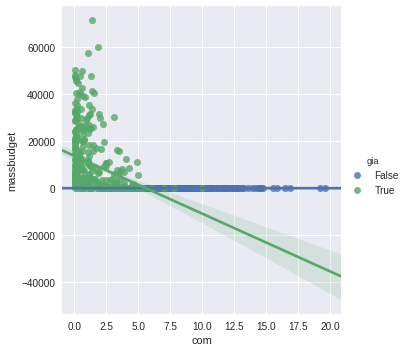

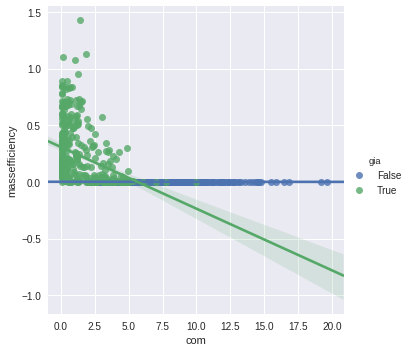

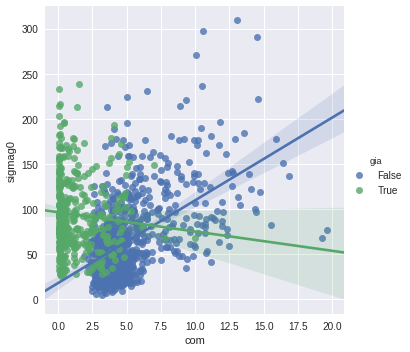

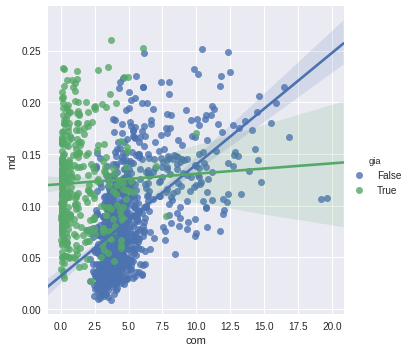

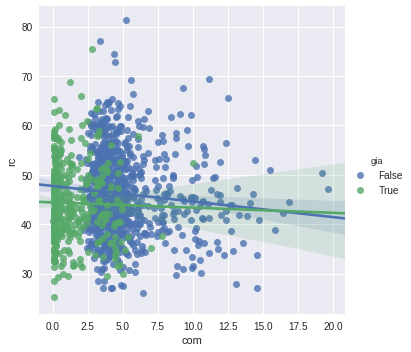

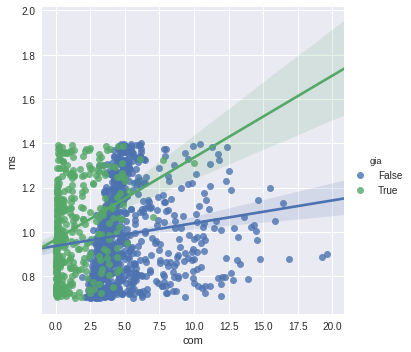

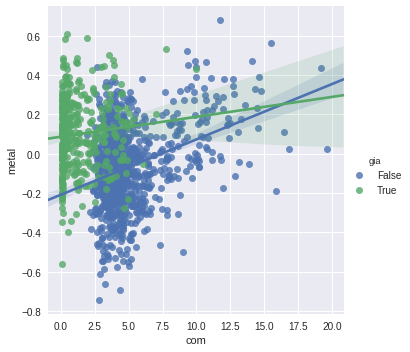

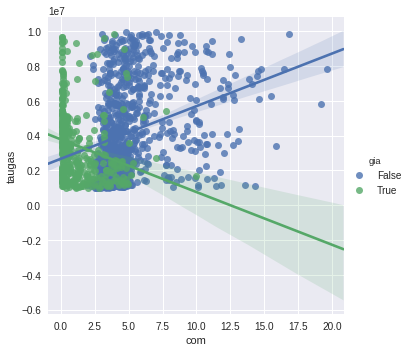

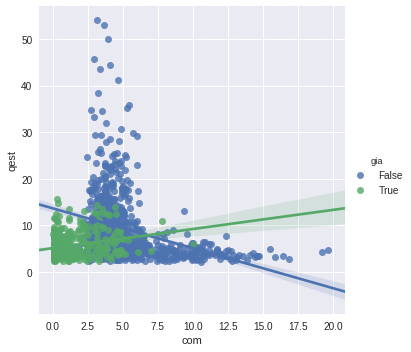

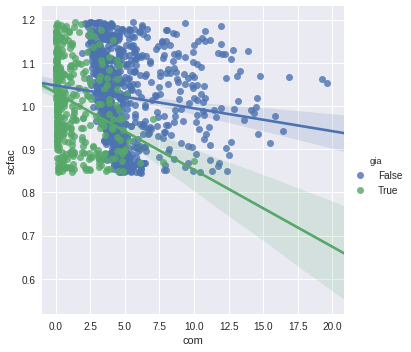

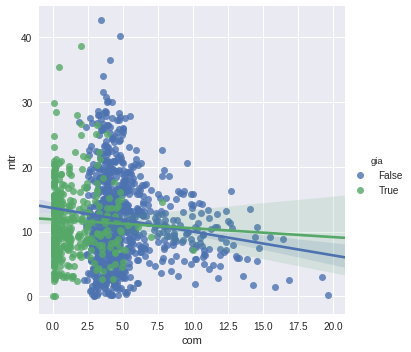

In [496]:
ref="com"
mylist=['nplanets', 'massbudget', 'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',  'qest','scfac','mtr']

for i in range(len(mylist)):
    v=[ref,mylist[i]]
    sns.lmplot(x=v[0],y=v[1],data=df,hue="gia")

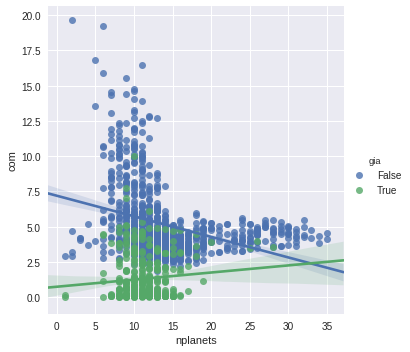

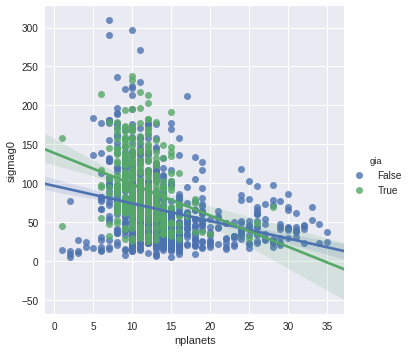

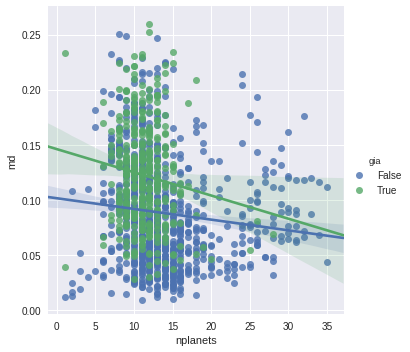

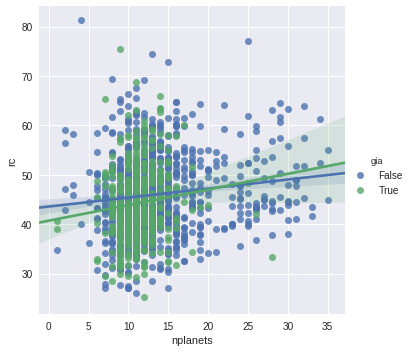

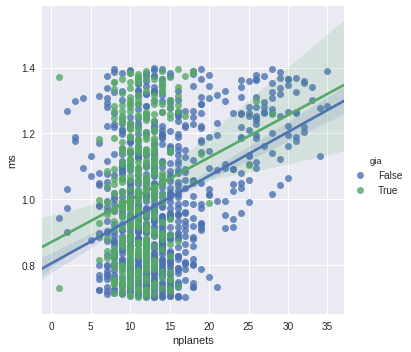

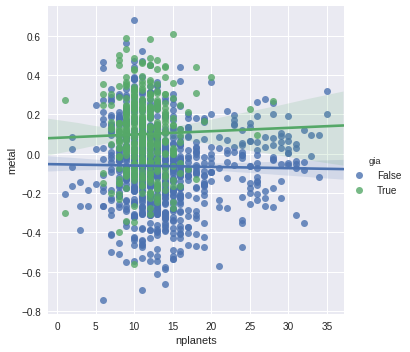

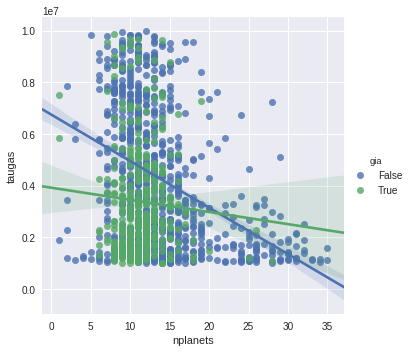

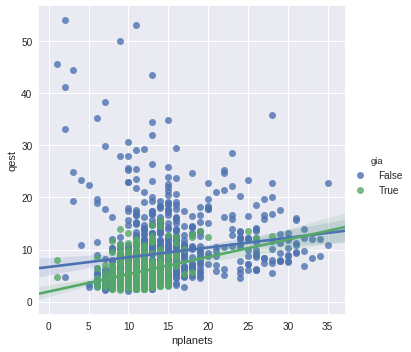

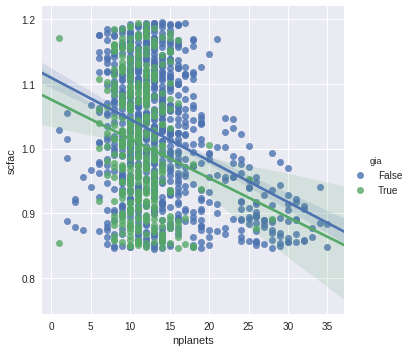

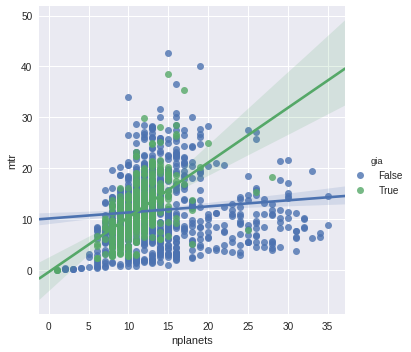

In [497]:
ref="nplanets"
mylist=['com', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',  'qest','scfac','mtr']

for i in range(len(mylist)):
    v=[ref,mylist[i]]
    sns.lmplot(x=v[0],y=v[1],data=df,hue="gia")

In [5]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [90]:
dfpno.columns

Index(['Unnamed: 0', 'ident', 'com', 'nplanets', 'massbudget',
       'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',
       'qest', 'scfac', 'ngi', 'mtr', 'apert', 'gia'],
      dtype='object')

In [15]:
def probch(model,X,y):
    check=[]
    for i in range(len(X)):
        check+=[model.predict(np.array([X[i]]))==y[i]]
    check=np.array(check)
    print(check.sum()*100/len(check))

In [136]:
inlist=['sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas', 'qest','scfac','apert']
#inlist=[ 'sigmag0']

In [213]:
Xno=np.array(dfpno[inlist])
yno=dfpno.gia*1
Xlo=np.array(dfplo[inlist])
ylo=dfplo.gia*1
Xhi=np.array(dfphi[inlist])
yhi=dfphi.gia*1
X=np.vstack([Xno,Xlo,Xhi])
y=np.hstack([yno,ylo,yhi])

In [130]:
tree = DecisionTreeClassifier().fit(X, y)
probch(tree,X,y)
probch(tree,Xno,yno)
probch(tree,Xlo,ylo)
probch(tree,Xhi,yhi)

90.8771929825
100.0
86.6396761134
85.991902834


In [131]:
print(100-dfpno.gia.sum()*100/len(dfpno),100-dfplo.gia.sum()*100/len(dfplo),100-dfphi.gia.sum()*100/len(dfphi))

69.3927125506 64.7773279352 64.1295546559


In [132]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [133]:
probch(bag,X,y)
probch(bag,Xno,yno)
probch(bag,Xlo,ylo)
probch(bag,Xhi,yhi)

90.8502024291
99.9190283401
86.8016194332
85.8299595142


In [214]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=1)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [216]:
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       0.81      0.79      0.80       607
          1       0.62      0.64      0.63       320

avg / total       0.74      0.74      0.74       927



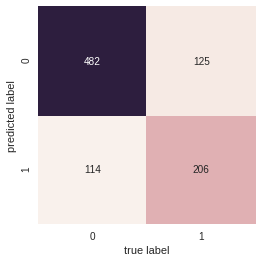

In [217]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [218]:
ix0=np.arange(len(y))[y==0]

In [219]:
np.random.seed(3)
ix0r=ix0[np.random.choice([True,False],len(ix0),p=[0.5,0.5])]

In [220]:
X0=np.array([X[i] for i in ix0r])
y0=np.array([y[i] for i in ix0r])
X1=X[y==1]
y1=y[y==1]
X50=np.vstack((X0,X1))
y50=np.hstack((y0,y1))

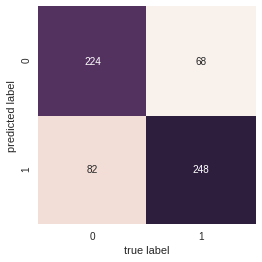

In [221]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X50,y50,
                                                random_state=1)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [222]:
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       0.73      0.77      0.75       292
          1       0.78      0.75      0.77       330

avg / total       0.76      0.76      0.76       622



In [223]:
dfpno.columns

Index(['Unnamed: 0', 'ident', 'com', 'nplanets', 'massbudget',
       'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',
       'qest', 'scfac', 'ngi', 'mtr', 'apert', 'gia'],
      dtype='object')

In [579]:
inlist=[ 'ngi','massbudget','com']

Xno=np.array(dfpno[inlist])
yno=np.ones((len(dfpno)))*0
Xhi=np.array(dfphi[inlist])
yhi=np.ones((len(dfpno)))*1
X=np.vstack([Xno,Xhi])
y=np.hstack([yno,yhi])

In [580]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=1)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [581]:
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

        0.0       0.57      0.54      0.55       314
        1.0       0.55      0.58      0.56       304

avg / total       0.56      0.56      0.56       618



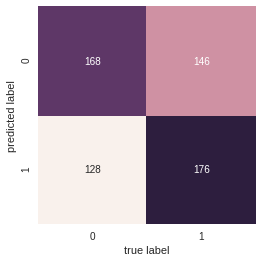

In [582]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [505]:
dfpno.columns

Index(['Unnamed: 0', 'ident', 'com', 'nplanets', 'massbudget',
       'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',
       'qest', 'scfac', 'ngi', 'mtr', 'apert', 'gia'],
      dtype='object')

In [590]:
inlist=['com']

Xno=np.array(dfpno[inlist])
yno=np.ones((len(dfpno)))*0
Xlo=np.array(dfplo[inlist])
ylo=np.ones((len(dfplo)))*1
Xhi=np.array(dfphi[inlist])
yhi=np.ones((len(dfpno)))*1

In [591]:
Xgi=np.vstack((Xno[dfpno.gia],Xhi[dfphi.gia]))
ygi=np.hstack((yno[dfpno.gia],yhi[dfphi.gia]))

In [592]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xgi,ygi,
                                                random_state=1)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [569]:
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

        0.0       0.60      0.56      0.58        94
        1.0       0.65      0.68      0.66       112

avg / total       0.62      0.63      0.63       206



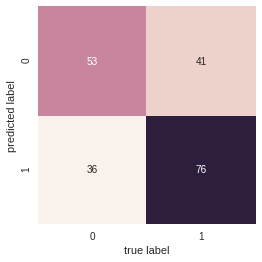

In [570]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [594]:
Xtrain[0]

array([ 3.46490323])

In [602]:
model.predict(7.52)

array([ 0.])

In [58]:
#X=np.arange(len(X))[:,np.newaxis]

IndexError: index 1 is out of bounds for axis 1 with size 1

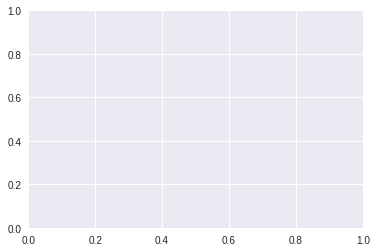

In [172]:
visualize_classifier(DecisionTreeClassifier(), X, y)

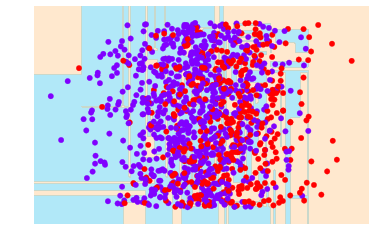

In [45]:
visualize_classifier(DecisionTreeClassifier(), Xlo, ylo)

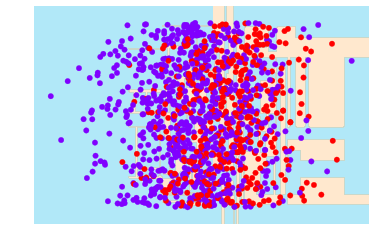

In [46]:
visualize_classifier(DecisionTreeClassifier(), Xhi, yhi)

In [80]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

IndexError: index 1 is out of bounds for axis 1 with size 1

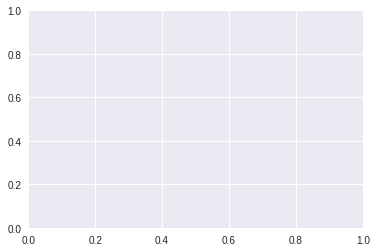

In [81]:
visualize_classifier(bag, X, y)

In [ ]:
#giant planet or no planet random forest prediction? first approach try to predict if there will be giant planets
#second analyze terrestrial systems (with/without giants)
#third analyze giant systems